In [1]:
import numpy as np
import scipy as sp
import arviz as az
from src.baseSIR import mle
from src.baseSIR import mle_sir
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import time

In [2]:
Size_c0 = pd.DataFrame(np.genfromtxt(f"../../Data/Final_size_no_c_fixed_G.csv", delimiter= ","), columns = ("S","N"))
Size_c1 = pd.DataFrame(np.genfromtxt(f"../../Data/Final_size_c1_fixed_G.csv", delimiter= ","), columns = ("S","N"))
Size_c2 = pd.DataFrame(np.genfromtxt(f"../../Data/Final_size_c2_fixed_G.csv", delimiter= ","),columns = ("S","N"))
Size_c3 = pd.DataFrame(np.genfromtxt(f"../../Data/Final_size_c3_fixed_G.csv", delimiter= ","),columns = ("S","N"))

Ext_c0 = pd.DataFrame(np.genfromtxt(f"../../Data/Pr_ext_no_c_fixed_G.csv", delimiter= ","),columns = ("S","N"))
Ext_c1 = pd.DataFrame(np.genfromtxt(f"../../Data/Pr_ext_c1_fixed_G.csv", delimiter= ","), columns = ("S","N"))
Ext_c2 = pd.DataFrame(np.genfromtxt(f"../../Data/Pr_ext_c2_fixed_G.csv", delimiter= ","), columns = ("S","N"))
Ext_c3 = pd.DataFrame(np.genfromtxt(f"../../Data/Pr_ext_c3_fixed_G.csv", delimiter= ","), columns = ("S","N"))

In [3]:
print(Size_c0)

             S       N
0   935.368957    10.0
1   926.237624    10.0
2   920.246914    10.0
3   915.681234    10.0
4   938.048780    10.0
5   907.650273    10.0
6   915.363128    10.0
7   904.129794    10.0
8   898.200514    10.0
9   912.362637    10.0
10  956.660000   100.0
11  952.310000   100.0
12  944.020000   100.0
13  932.570000   100.0
14  950.110000   100.0
15  943.240000   100.0
16  944.860000   100.0
17  941.080000   100.0
18  934.910000   100.0
19  939.680000   100.0
20  957.871000  1000.0
21  958.477000  1000.0
22  948.181000  1000.0
23  937.553000  1000.0
24  955.035000  1000.0
25  948.919000  1000.0
26  944.300000  1000.0
27  948.487000  1000.0
28  944.857000  1000.0
29  946.454000  1000.0


In [4]:
Size_c0["C"] = "No Control"
Size_c1["C"] = "Reduction in Beta: 0.5*B"
Size_c2["C"] = "Additive Gamma: Gamma + 1"
Size_c3["C"] = "20% Cull every 0.5 Time Units"

Ext_c0["C"] = "No Control"
Ext_c1["C"] = "Reduction in Beta: 0.5*B"
Ext_c2["C"] = "Additive Gamma: Gamma + 1"
Ext_c3["C"] = "20% Cull every 0.5 Time Units"

Sizes = pd.concat([Size_c0,Size_c1,Size_c2,Size_c3])

Exts = pd.concat([Ext_c0,Ext_c1,Ext_c2,Ext_c3])

In [5]:
print(Exts)

        S       N                              C
0   0.607    10.0                     No Control
1   0.596    10.0                     No Control
2   0.595    10.0                     No Control
3   0.611    10.0                     No Control
4   0.590    10.0                     No Control
..    ...     ...                            ...
25  0.000  1000.0  20% Cull every 0.5 Time Units
26  0.000  1000.0  20% Cull every 0.5 Time Units
27  0.000  1000.0  20% Cull every 0.5 Time Units
28  0.000  1000.0  20% Cull every 0.5 Time Units
29  0.000  1000.0  20% Cull every 0.5 Time Units

[120 rows x 3 columns]


In [6]:
print(Sizes[Sizes["C"] == "1"])

Empty DataFrame
Columns: [S, N, C]
Index: []


C:\Users\ollie\AppData\Local\Temp\ipykernel_28024\2707413883.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


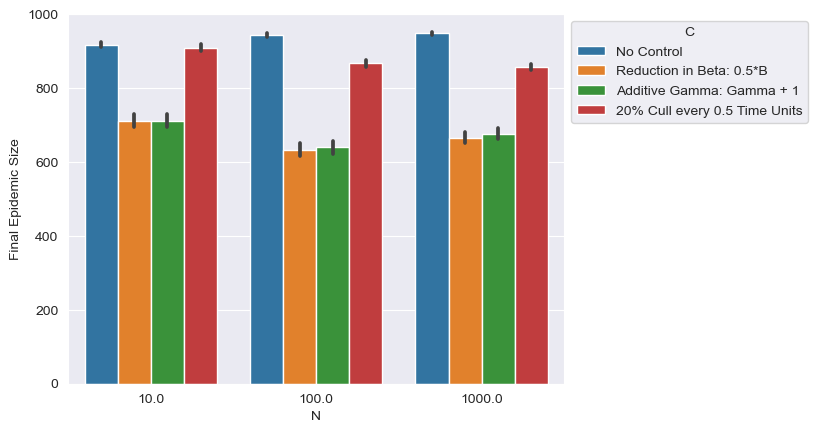

In [7]:
fig, ax0 = plt.subplots()
sns.barplot(data = Sizes, x = "N", y = "S", hue = "C", ax = ax0)
sns.move_legend(ax0, "upper left", bbox_to_anchor=(1, 1))
ax0.set_xlabel("N")
ax0.set_ylabel("Final Epidemic Size")
fig.show()

C:\Users\ollie\AppData\Local\Temp\ipykernel_28024\2267126336.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


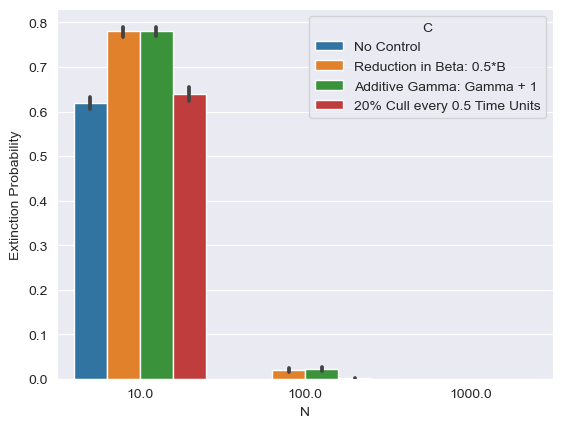

In [8]:
fig, ax0 = plt.subplots()
sns.barplot(data = Exts, x = "N", y = "S", hue = "C", ax = ax0)
ax0.set_xlabel("N")
ax0.set_ylabel("Extinction Probability")
fig.show()

In [9]:
sp.stats.ttest_rel(Size_c0[Size_c0["N"] == 10]["S"], Size_c0[Size_c0["N"] == 1000]["S"])

TtestResult(statistic=-10.0140526647588, pvalue=3.536651724245984e-06, df=9)